In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# load dataset into Pandas DataFrame
data = pd.read_csv(r"E:\ML-2024-25\Feature Engineering -Data Sets\Data\Qinspection.csv")
print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
print(data)

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------
     feature1  feature2  feature3  feature4  feature5  feature6 class
0         4.9       4.7       3.2       1.3       0.2       0.3     A
1         4.8       4.6       3.1       1.5       0.2       0.3     A
2         5.2       5.0       3.6       1.4       0.2       0.3     A
3         5.6       5.4       3.9       1.7       0.4       0.5     A
4         4.8       4.6       3.4       1.4       0.3       0.4     A
..        ...       ...       ...       ...       ...       ...   ...
139       7.0       6.8       3.2       5.9       2.3       2.4     C
140       6.9       6.7       3.3       5.7       2.5       2.6     C
141       6.9       6.7       3.0       5.2       2.3       2.4     C
142       6.5       6.3       2.5       5.0       1.9       2.0     C
143       6.7       6.5       3.0       5.2       2.0       2.1  

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  144 non-null    float64
 1   feature2  144 non-null    float64
 2   feature3  144 non-null    float64
 3   feature4  144 non-null    float64
 4   feature5  144 non-null    float64
 5   feature6  144 non-null    float64
 6   class     144 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.0+ KB


In [3]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.052083,5.852083,3.054861,3.764583,1.199306,1.299306
std,0.838161,0.838161,0.441996,1.769575,0.761623,0.761623
min,4.500000,4.300000,2.000000,1.000000,0.100000,0.200000
25%,5.300000,5.100000,2.800000,1.600000,0.300000,0.400000
50%,6.000000,5.800000,3.000000,4.350000,1.300000,1.400000
75%,6.600000,6.400000,3.300000,5.100000,1.800000,1.900000
max,8.100000,7.900000,4.400000,6.900000,2.500000,2.600000


C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

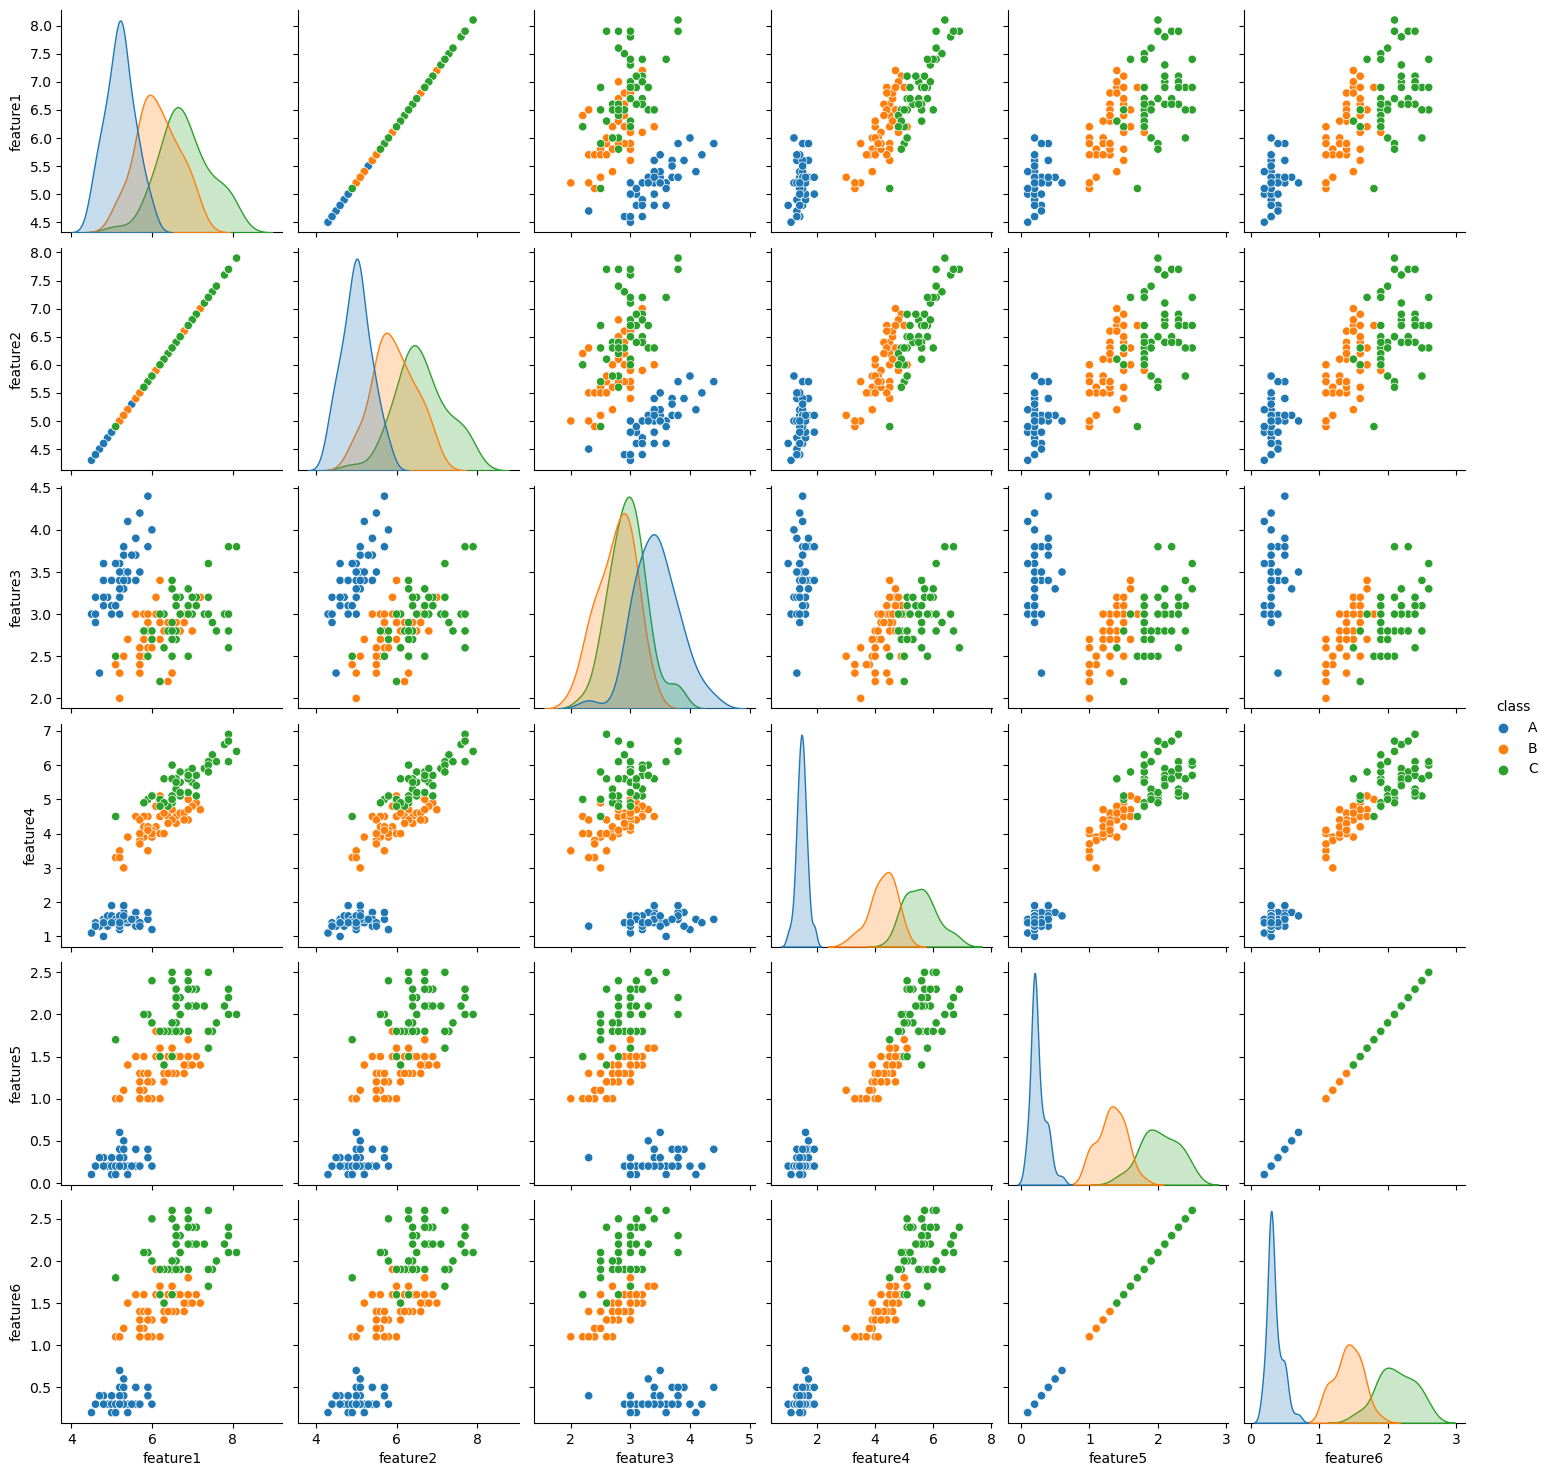

In [4]:
#Visualization of class distribution in the original feature space
#--------------------------------------------------------
import seaborn as sns
sns.pairplot(data,  hue='class')

In [5]:
#-----------------------------------------------------------------------------------
features = ['feature1', 'feature2', 'feature3', 'feature4','feature5','feature6']
# Separating out the features
training=data.loc[:,features].values
# Separating out the target
classlabel = data.iloc[:,-1]
#-----------------------------------------------------------------------------------

In [6]:
# Standardizing the features
training = StandardScaler().fit_transform(training)
#-----------------------------------------------------------------------------------

In [14]:
training.dtype

dtype('float64')

In [19]:
# Converting feature matrix into DataFrame
df = pd.DataFrame(training)
# Creating correlation matrix
cor_matrix = df.corr().abs()
print(cor_matrix); 

          0         1         2         3         4         5
0  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
1  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
2  0.116306  0.116306  1.000000  0.434256  0.374636  0.374636
3  0.871991  0.871991  0.434256  1.000000  0.962737  0.962737
4  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000
5  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000


In [ ]:
#Sort correlation matrix without duplicates

In [36]:
ndf=pd.DataFrame(cor_matrix)
ndf.columns=features
ndf.index=features
ndf

,feature1,feature2,feature3,feature4,feature5,feature6
feature1,1.000000,1.000000,0.116306,0.871991,0.819242,0.819242
feature2,1.000000,1.000000,0.116306,0.871991,0.819242,0.819242
feature3,0.116306,0.116306,1.000000,0.434256,0.374636,0.374636
feature4,0.871991,0.871991,0.434256,1.000000,0.962737,0.962737
feature5,0.819242,0.819242,0.374636,0.962737,1.000000,1.000000
feature6,0.819242,0.819242,0.374636,0.962737,1.000000,1.000000


In [25]:
# For this purpose triu() function is used which returns an upper triangular matrix with the shape of the correlation matrix
# (Value 1 for elements above the main diagonal and 0 for others). 
# The method astype() converts the matrix values to boolean. 

# Selecting upper triangle of correlation matrix
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print('Upper diagonal corelation matrix '); 
print(upper_tri)
print('-----------------------------\n')

Upper diagonal corelation matrix 
    0    1         2         3         4         5
0 NaN  1.0  0.116306  0.871991  0.819242  0.819242
1 NaN  NaN  0.116306  0.871991  0.819242  0.819242
2 NaN  NaN       NaN  0.434256  0.374636  0.374636
3 NaN  NaN       NaN       NaN  0.962737  0.962737
4 NaN  NaN       NaN       NaN       NaN  1.000000
5 NaN  NaN       NaN       NaN       NaN       NaN
-----------------------------



In [40]:
#Convert to 1-D series and drop Null values 
unique_corr_pairs = upper_tri.unstack().dropna() 

In [42]:
#Convert correlation matrix to 1-D Series and sort 
sorted_mat = unique_corr_pairs.sort_values() 
  
print(sorted_mat) 

2  1    0.116306
   0    0.116306
4  2    0.374636
5  2    0.374636
3  2    0.434256
4  0    0.819242
   1    0.819242
5  0    0.819242
   1    0.819242
3  0    0.871991
   1    0.871991
4  3    0.962737
5  3    0.962737
1  0    1.000000
5  4    1.000000
dtype: float64


------Correlation matrix-----


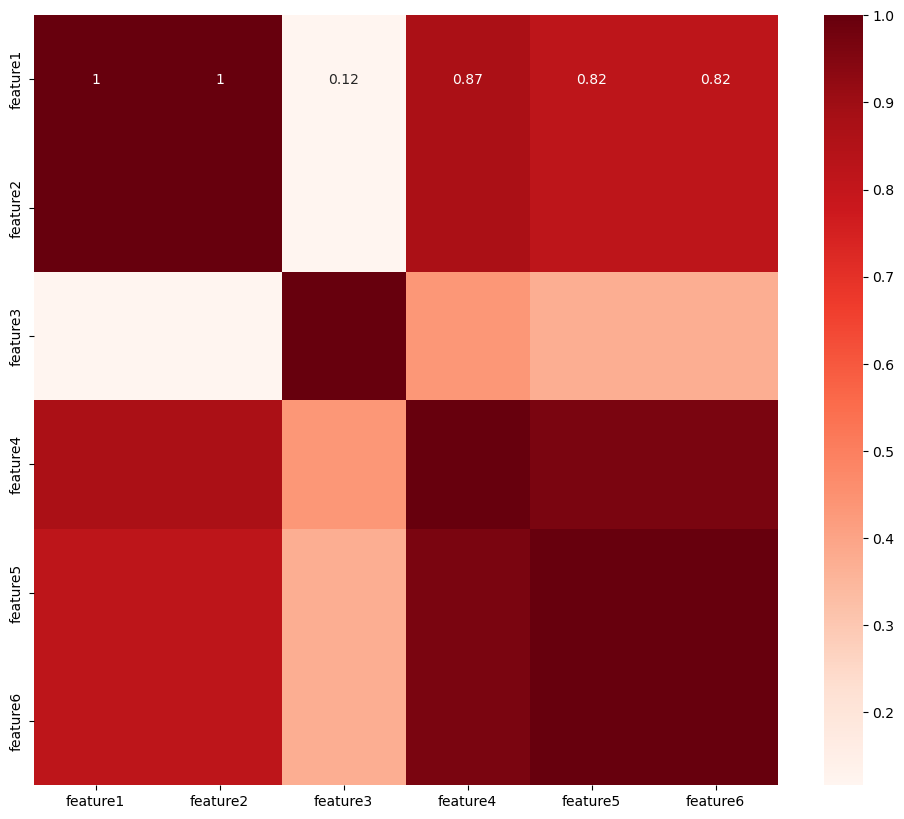

In [43]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
print('------Correlation matrix-----')
plt.figure(figsize=(12,10))
sns.heatmap(ndf, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
# Finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('correlated features to be dropped=',to_drop ); 
print('-----------------------------\n')

correlated features to be dropped= [1, 4, 5]
-----------------------------



In [27]:
# Droping Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(' after dropping the corelated features'); 
print(df1.head())
#-------------------------------------

 after dropping the corelated features
          0         2         3
0 -1.379335  0.329517 -1.397616
1 -1.499061  0.102481 -1.284200
2 -1.020160  1.237661 -1.340908
3 -0.541258  1.918768 -1.170784
4 -1.499061  0.783589 -1.340908


          0         2         3
0 -1.379335  0.329517 -1.397616
1 -1.499061  0.102481 -1.284200
2 -1.020160  1.237661 -1.340908
3 -0.541258  1.918768 -1.170784
4 -1.499061  0.783589 -1.340908


C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirisha Alamanda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


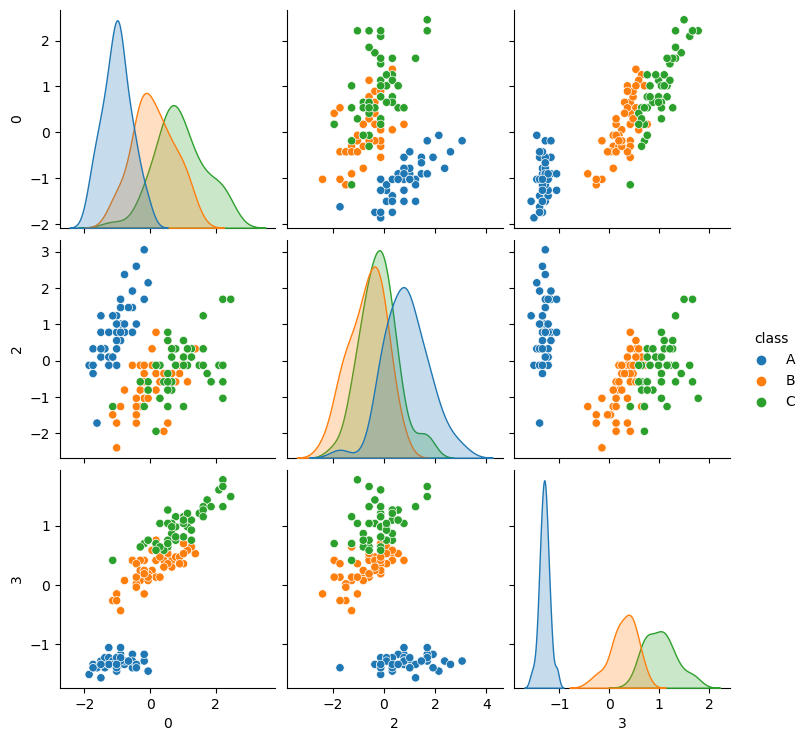

In [30]:
#Visualization of class distribution in reduced feature space (After feature selection)
#-------------------------------------
#convert label to dataframe
dflabel=pd.DataFrame(classlabel)
#concatenate seected features and class label
dfnew=pd.concat([df1,dflabel],axis=1)
print(df1.head())
#plot graph
sns.pairplot(dfnew,  hue='class')